In [1]:
import pandas as pd

file_path = '/Users/raddayurieva/Downloads/archive/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv'

df = pd.read_csv(file_path, sep='|')
print(df.head())

             ts                 uid        id.orig_h  id.orig_p  \
0  1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103    51524.0   
1  1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103    56305.0   
2  1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103    41101.0   
3  1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103    60905.0   
4  1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103    44301.0   

         id.resp_h  id.resp_p proto service  duration orig_bytes  ...  \
0   65.127.233.163       23.0   tcp       -  2.999051          0  ...   
1    63.150.16.171       23.0   tcp       -         -          -  ...   
2     111.40.23.49       23.0   tcp       -         -          -  ...   
3  131.174.215.147       23.0   tcp       -  2.998796          0  ...   
4      91.42.47.63       23.0   tcp       -         -          -  ...   

  local_resp missed_bytes history orig_pkts  orig_ip_bytes resp_pkts  \
0          -          0.0       S       3.0          180.0       0.0   
1          -  

In [2]:
unique_labels = df['label'].value_counts()
print("Unique 'labels':")
print(unique_labels)

Unique 'labels':
label
Malicious    539473
Benign       469275
Name: count, dtype: int64


In [3]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')

In [4]:
df.shape

(1008748, 23)

In [5]:
df = df.copy().dropna()

In [6]:
num_cols = df.select_dtypes(exclude='object')
num_cols.shape

(1008748, 8)

In [7]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,uid,id.orig_h,id.resp_h,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,history,tunnel_parents,label,detailed-label
0,CUmrqr4svHuSXJy5z7,192.168.100.103,65.127.233.163,tcp,-,2.999051,0,0,S0,-,-,S,-,Malicious,PartOfAHorizontalPortScan
1,CH98aB3s1kJeq6SFOc,192.168.100.103,63.150.16.171,tcp,-,-,-,-,S0,-,-,S,-,Malicious,PartOfAHorizontalPortScan
2,C3GBTkINvXNjVGtN5,192.168.100.103,111.40.23.49,tcp,-,-,-,-,S0,-,-,S,-,Malicious,PartOfAHorizontalPortScan
3,CDe43c1PtgynajGI6,192.168.100.103,131.174.215.147,tcp,-,2.998796,0,0,S0,-,-,S,-,Malicious,PartOfAHorizontalPortScan
4,CJaDcG3MZzvf1YVYI4,192.168.100.103,91.42.47.63,tcp,-,-,-,-,S0,-,-,S,-,Malicious,PartOfAHorizontalPortScan


In [8]:
cat_cols.shape

(1008748, 15)

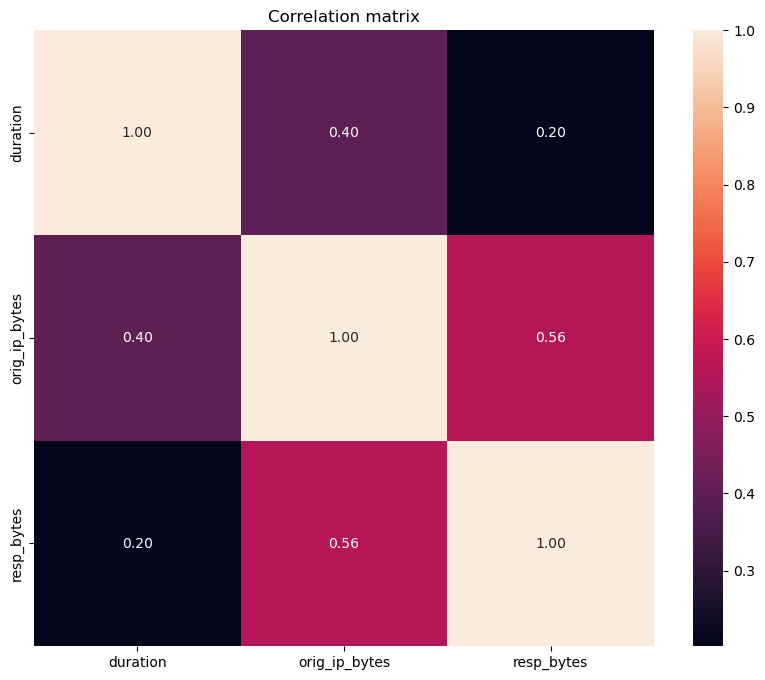

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Предполагается, что df - это ваш DataFrame
df = df.replace('-', np.nan)

num_vars = ['duration', 'orig_ip_bytes', 'resp_bytes'] 
for col in num_vars:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Теперь вы можете построить корреляционную матрицу без ошибки
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_vars].corr(), annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [10]:
print("Key characteristics of the data:")
print(df.info())

# Viewing the first few rows
print("\nFirst few rows of the data:")
print(df.head())

# Searching for missing values
print("\nMissing values by column:")
print(df.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Key characteristics of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1008748 non-null  float64
 1   uid             1008748 non-null  object 
 2   id.orig_h       1008748 non-null  object 
 3   id.orig_p       1008748 non-null  float64
 4   id.resp_h       1008748 non-null  object 
 5   id.resp_p       1008748 non-null  float64
 6   proto           1008748 non-null  object 
 7   service         3241 non-null     object 
 8   duration        212448 non-null   float64
 9   orig_bytes      212448 non-null   object 
 10  resp_bytes      212448 non-null   float64
 11  conn_state      1008748 non-null  object 
 12  local_orig      0 non-null        float64
 13  local_resp      0 non-null        float64
 14  missed_bytes    1008748 non-null  float64
 15  history         991327 non-null   object 
 16  ori

In [11]:
# Analysis of the distribution of categorical columns
print("\nDistribution of categorical columns:")
for col in ['proto', 'service', 'label', 'detailed-label']:
    print(f"\nDistribution for {col}:")
    print(df[col].value_counts())


Distribution of categorical columns:

Distribution for proto:
proto
tcp     583134
udp     408193
icmp     17421
Name: count, dtype: int64

Distribution for service:
service
http    3238
dhcp       1
ssh        1
dns        1
Name: count, dtype: int64

Distribution for label:
label
Malicious    539473
Benign       469275
Name: count, dtype: int64

Distribution for detailed-label:
detailed-label
PartOfAHorizontalPortScan    539465
C&C                               8
Name: count, dtype: int64


/Users/raddayurieva/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [ 5  6 12]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


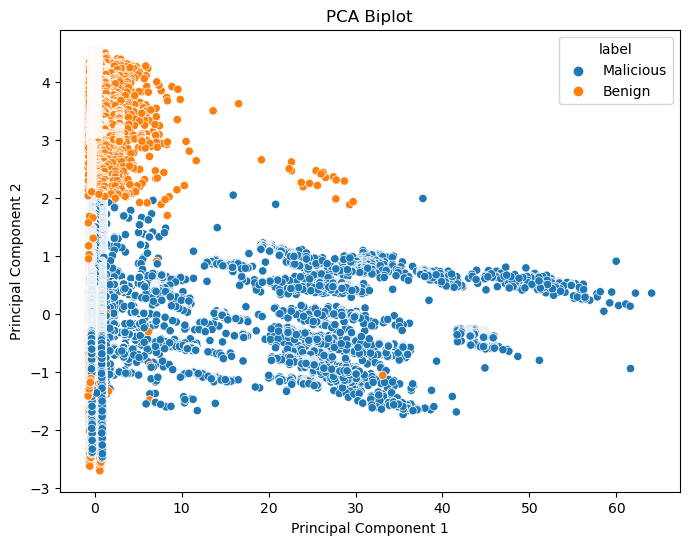

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np

# Creating an imputer that replaces missing values with the mean value of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Transforming the data: fitting the imputer and replacing missing values
X_imputed = imputer.fit_transform(X)

# Now X_imputed can be used for PCA as it no longer contains missing values
pca = PCA(n_components=2)
components = pca.fit_transform(X_imputed)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['label'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.show()

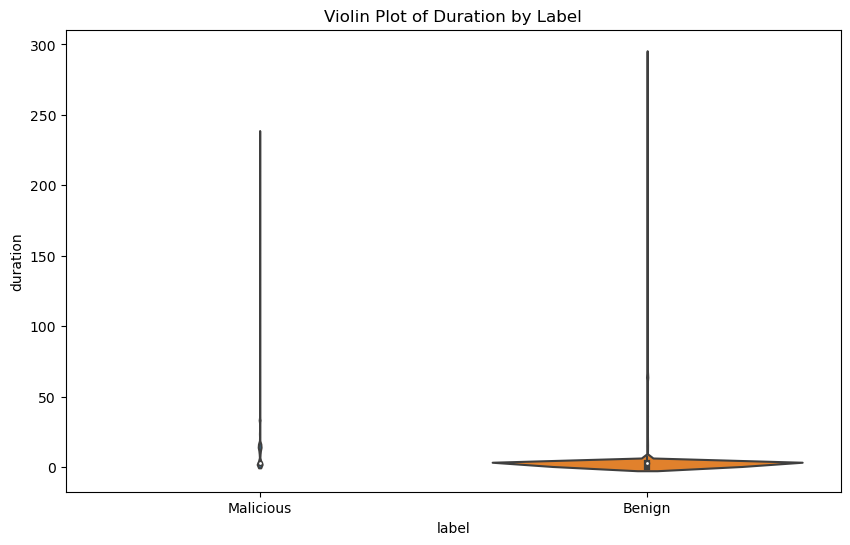

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='label', y='duration')
plt.title('Violin Plot of Duration by Label')
plt.show()


/Users/raddayurieva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


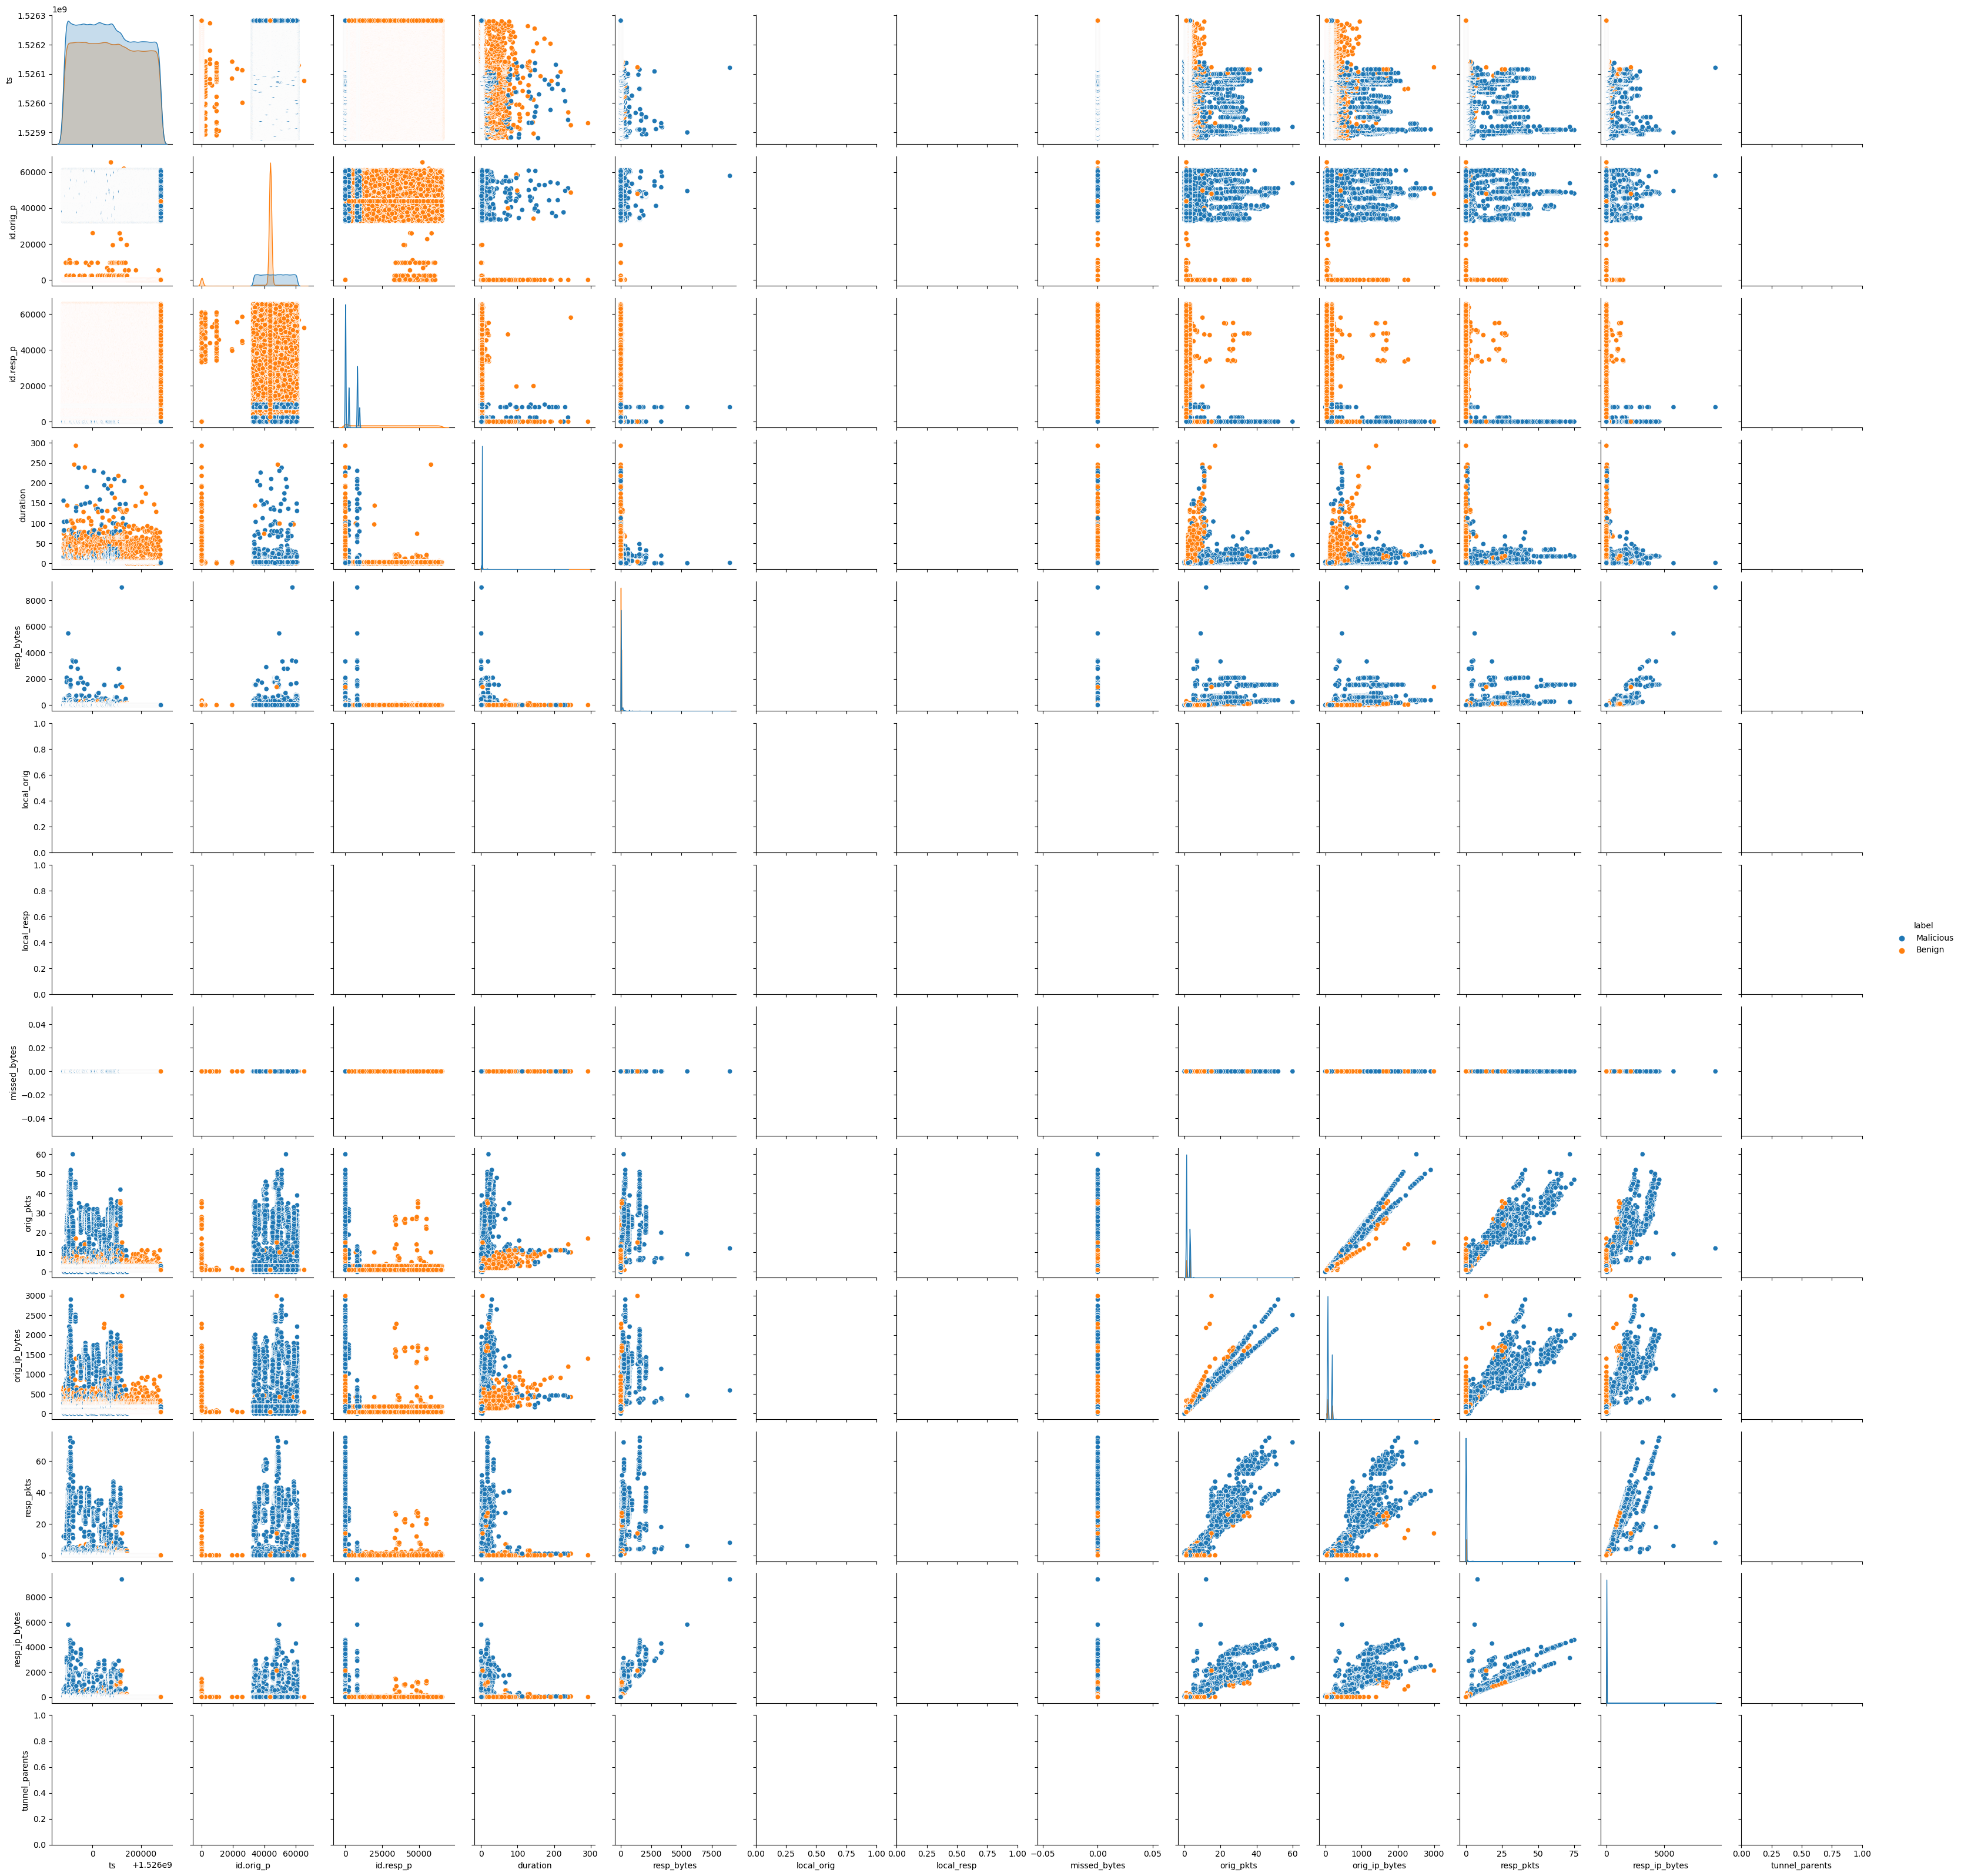

In [15]:
sns.pairplot(df, hue='label')
plt.show()

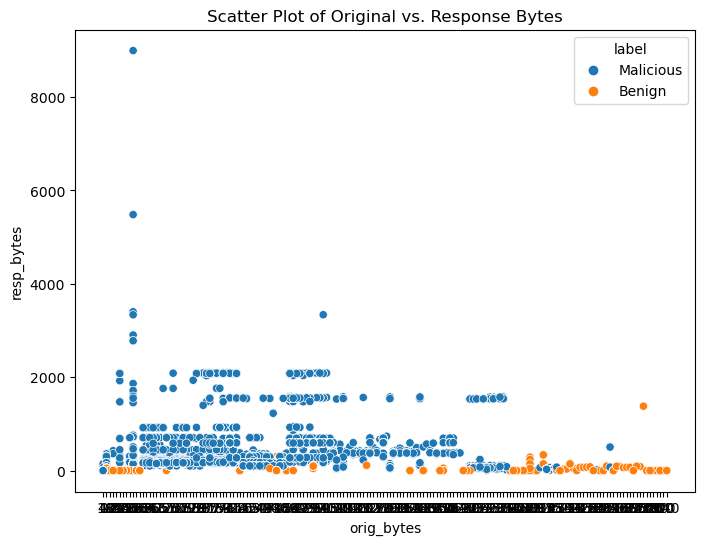

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='orig_bytes', y='resp_bytes', hue='label')
plt.title('Scatter Plot of Original vs. Response Bytes')
plt.show()

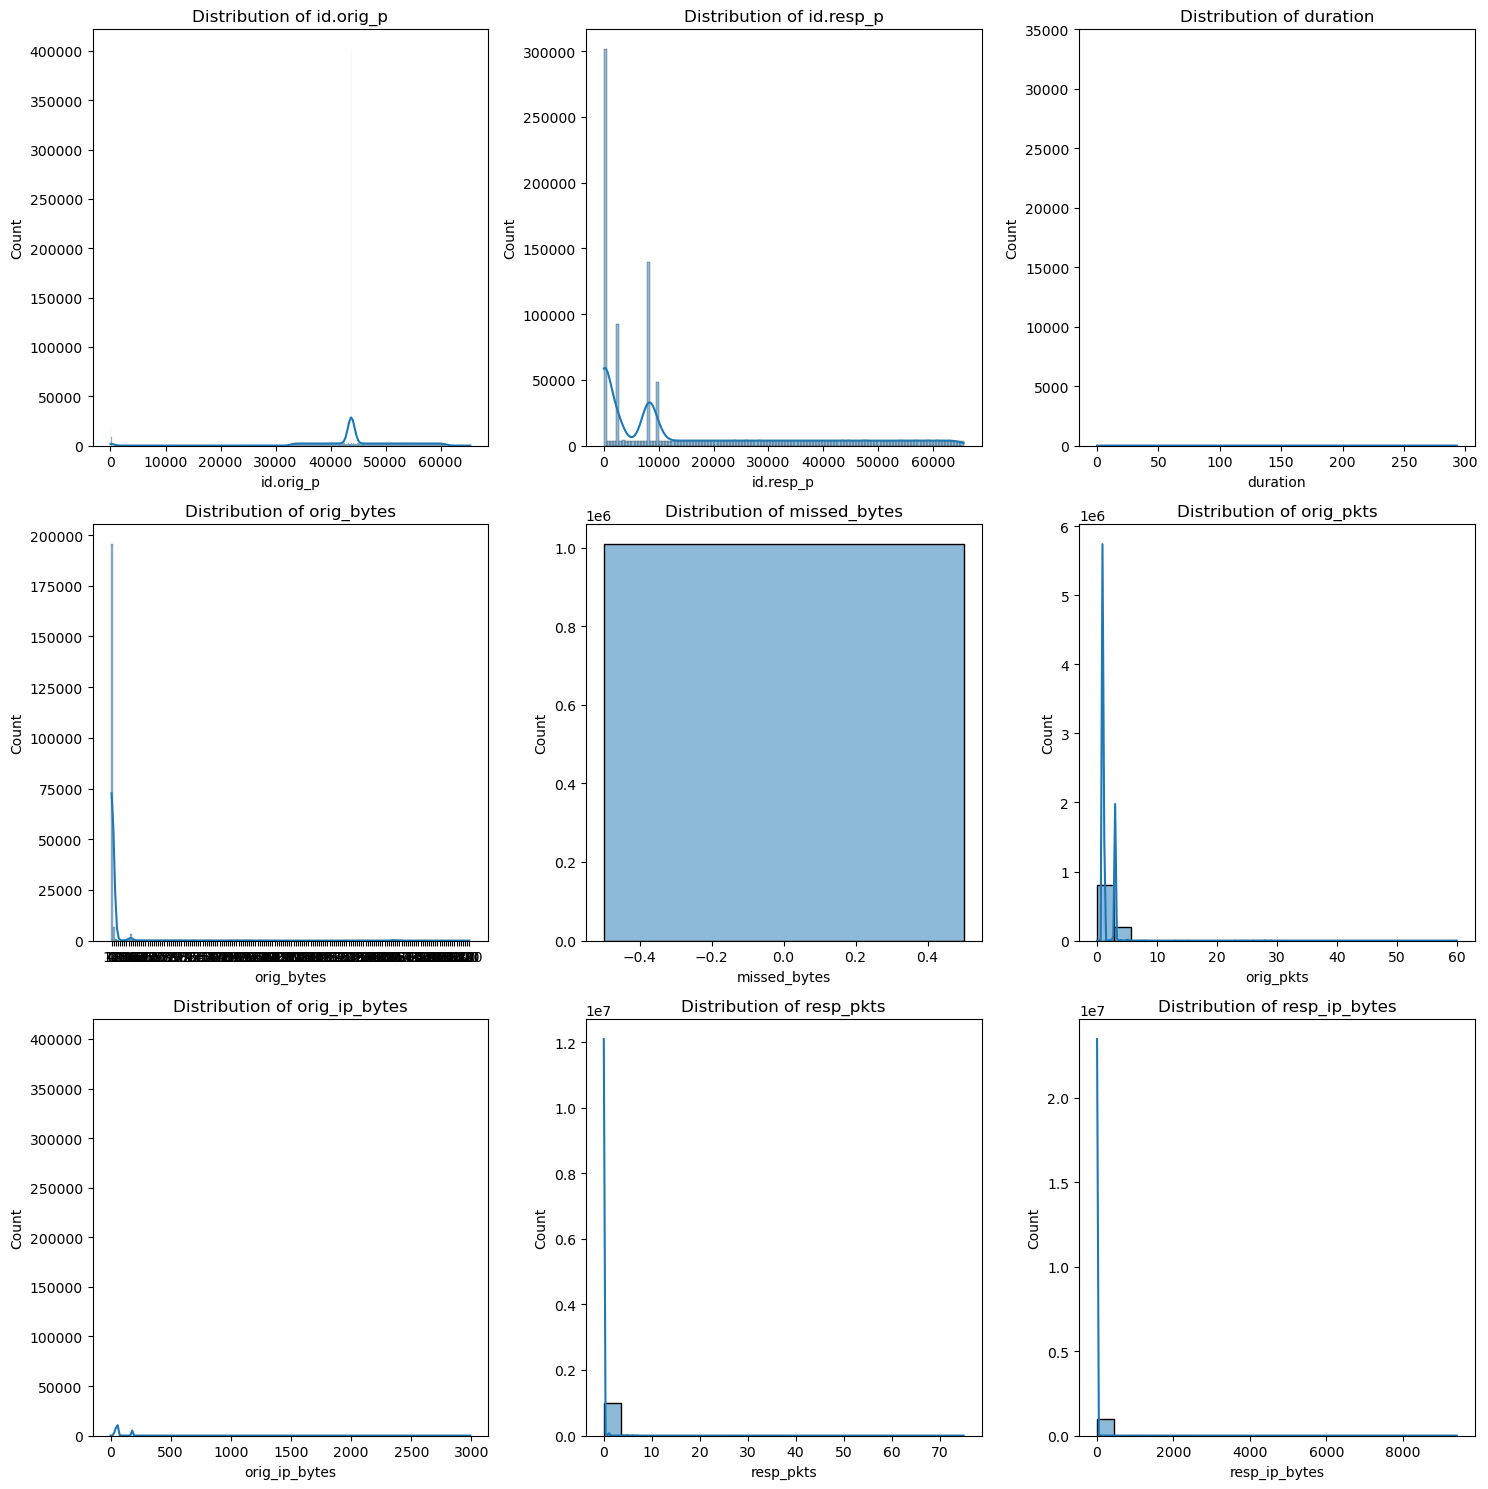

In [17]:
# Visualization of the distributions of numerical variables
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
num_vars = ['id.orig_p', 'id.resp_p', 'duration', 'orig_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']
for var, subplot in zip(num_vars, ax.flatten()):
    sns.histplot(df[var], kde=True, ax=subplot)
    subplot.set_title(f'Distribution of {var}')
plt.tight_layout()